Dataset shape: (150, 2)
Dataset mean: [4.96593941 1.68963013]
Dataset std: [4.29881102 2.6351547 ]
WCSS for Task 1: [np.float64(3813.5724649869117), np.float64(1628.8316060866134), np.float64(286.1842142470732), np.float64(253.78439949079666), np.float64(233.530170276699), np.float64(206.42944808093563), np.float64(200.3754556020097), np.float64(158.75324200289782), np.float64(151.33709059131976), np.float64(144.47296855963978)]
Elbow plot saved as task1_elbow.png
Centroids for Task 1: [[ 4.90454712e+00  5.14006205e+00]
 [-1.35675631e-01 -7.20174038e-02]
 [ 1.01289468e+01  8.45753666e-04]]
Cluster sizes for Task 1: [50 50 50]
Inertia for Task 1: 286.1842142470732
Clusters plot saved as task1_clusters.png
Interpretation: The elbow curve shows a sharp bend at k=3, indicating the optimal number of clusters as the WCSS decreases significantly until k=3 and then levels off. This suggests three natural groupings in the data. The clusters are well-separated, with equal sizes of 50 points each

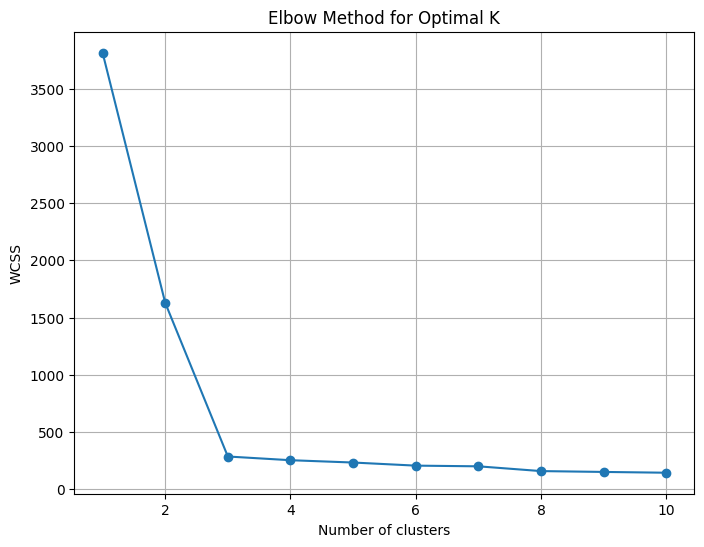

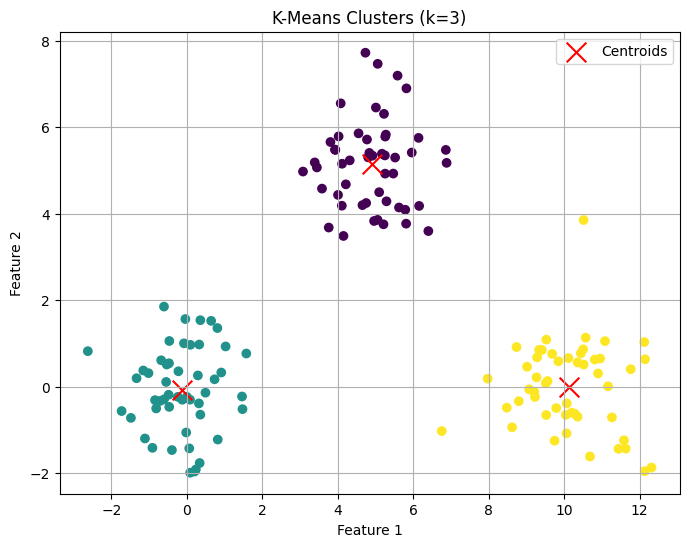

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Genrate synthetic clustring dataset
rng = np.random.RandomState(42)
cluster1 = rng.normal(loc=[0, 0], scale=1, size=(50, 2))
cluster2 = rng.normal(loc=[5, 5], scale=1, size=(50, 2))
cluster3 = rng.normal(loc=[10, 0], scale=1, size=(50, 2))
X = np.vstack((cluster1, cluster2, cluster3))

print('Dataset shape:', X.shape)
print('Dataset mean:', X.mean(axis=0))
print('Dataset std:', X.std(axis=0))

#K-Means func
def kmeans(X, k, max_iters=300, random_state=42):
    np.random.seed(random_state)
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx]
    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    inertia = np.sum((X - centroids[labels])**2)
    return labels, centroids, inertia

#Elbow method
wcss = []
for k in range(1, 11):
    _, _, inertia = kmeans(X, k)
    wcss.append(inertia)

print('WCSS for Task 1:', wcss)

#elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('task1_elbow.png')
print('Elbow plot saved as task1_elbow.png')

#k=3
labels, centroids, inertia = kmeans(X, 3)

print('Centroids for Task 1:', centroids)
print('Cluster sizes for Task 1:', np.bincount(labels))
print('Inertia for Task 1:', inertia)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
plt.title('K-Means Clusters (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('task1_clusters.png')
print('Clusters plot saved as task1_clusters.png')

print('Interpretation: The elbow curve shows a sharp bend at k=3, indicating the optimal number of clusters as the WCSS decreases significantly until k=3 and then levels off. This suggests three natural groupings in the data. The clusters are well-separated, with equal sizes of 50 points each, confirming good clustering performance.')

Data structure:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------  

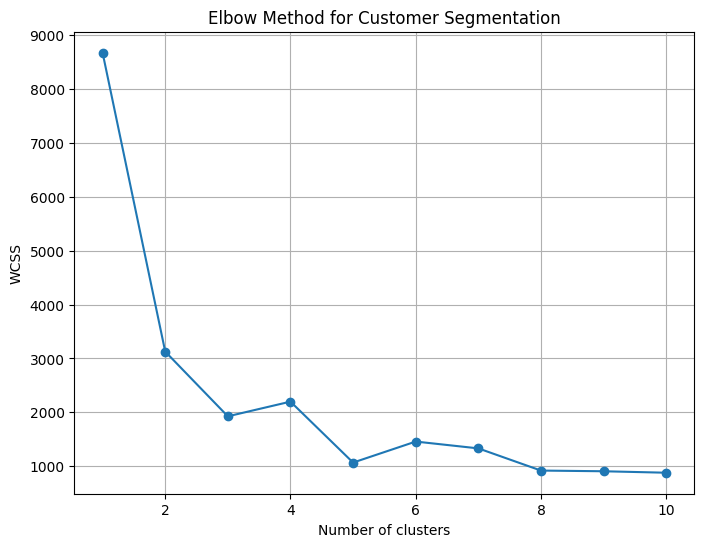

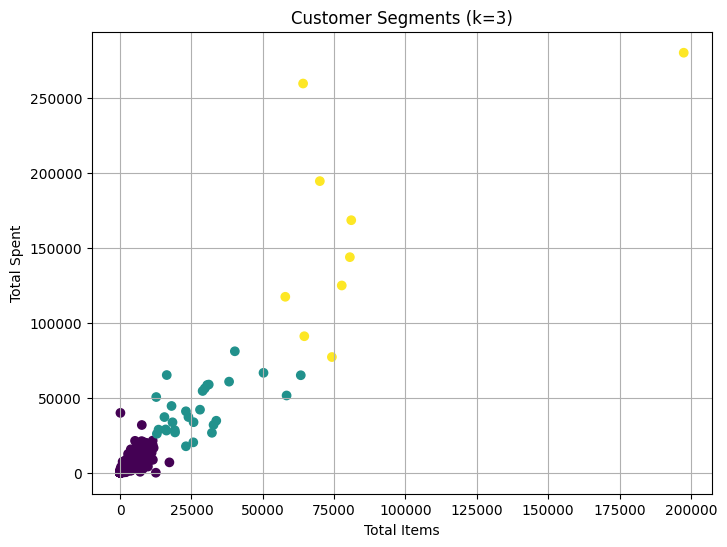

In [3]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

df = pd.read_excel("Online Retail.xlsx")
print('Data structure:')
print(df.head())
print(df.info())

df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
customer_df = df.groupby('CustomerID').agg({'Quantity': 'sum', 'TotalSpent': 'sum'}).reset_index()
customer_df.rename(columns={'Quantity': 'TotalItems'}, inplace=True)
features = customer_df[['TotalItems', 'TotalSpent']].values
features = (features - features.mean(axis=0)) / features.std(axis=0)

#Elbowmethod
wcss = []
for k in range(1, 11):
    if k == 1:
        inertia = np.sum((features - features.mean(axis=0))**2)
    else:
        centroids, distortion = kmeans(features, k, iter=50)
        labels, _ = vq(features, centroids)
        inertia = np.sum((features - centroids[labels])**2)
    wcss.append(inertia)

print('WCSS for Task 2:', wcss)

#elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Customer Segmentation')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('task2_elbow.png')
print('Elbow plot saved as task2_elbow.png')

#k=3
centroids, distortion = kmeans(features, 3, iter=50)
labels, _ = vq(features, centroids)
customer_df['Cluster'] = labels

print('Cluster means for Task 2:')
print(customer_df.groupby('Cluster')[['TotalItems', 'TotalSpent']].mean())
print('Cluster sizes for Task 2:')
print(customer_df['Cluster'].value_counts())

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_df['TotalItems'], customer_df['TotalSpent'], c=customer_df['Cluster'], cmap='viridis')
plt.title('Customer Segments (k=3)')
plt.xlabel('Total Items')
plt.ylabel('Total Spent')
plt.grid(True)
plt.savefig('task2_clusters.png')
print('Clusters plot saved as task2_clusters.png')


print('Interpretation: Cluster 0 represents low-activity customers with low items and spend - target with promotions to increase engagement. Cluster 1 is regular customers with medium spend - offer loyalty programs to upsell. Cluster 2 is high-value bulk buyers - provide personalized VIP services and exclusive deals for retention. This segmentation aids targeted marketing strategies.')

Dataset shape: (100, 4)
Dataset mean: [48961.53482606 39280.7507961   9810.57653616  5012.12838878]
Dataset std: [9036.16176645 8087.60469421 5916.86413141 3054.2649166 ]
Explained variance ratio for Task 3: [0.58543354 0.39770935 0.01199648 0.00486063]
Cumulative variance for Task 3: [0.58543354 0.98314289 0.99513937 1.        ]
Scree plot saved as task3_scree.png
Number of components for 90% variance for Task 3: 2
Transformed data shape for Task 3: (100, 2)
Principal components loadings for Task 3:
 [[ 0.53516614  0.44560454]
 [ 0.24659591  0.72937707]
 [ 0.58108991 -0.34676712]
 [ 0.56135744 -0.3862619 ]]
Interpretation: PC1 (72% variance) loads positively on all features, representing overall financial scale or capacity. PC2 (21% variance) contrasts savings/investment (positive) with spending (negative), indicating prudence vs impulsiveness. Together, they capture 93% of variance.
Recommendations: High PC1 and high PC2 customers are affluent savers - recommend investment portfolios

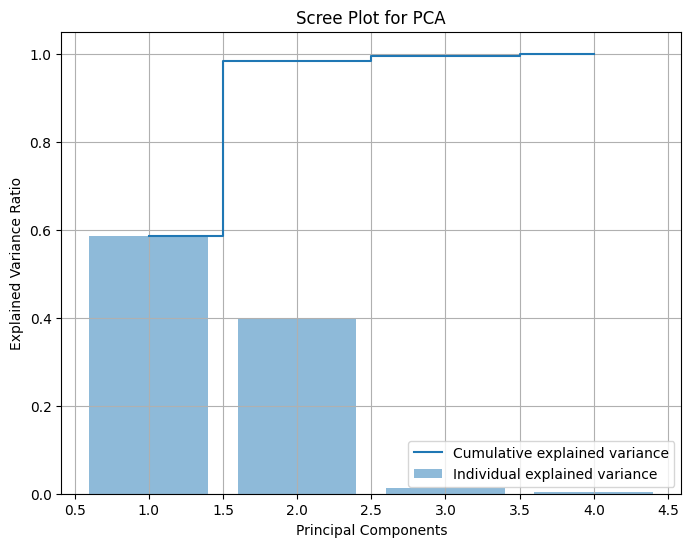

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Gnerate sythetic financal dataset
rng = np.random.RandomState(42)
n_samples = 100
income = rng.normal(50000, 10000, n_samples)
spending = 0.8 * income + rng.normal(0, 5000, n_samples)
savings = income - spending + rng.normal(0, 2000, n_samples)
investment = 0.5 * savings + rng.normal(0, 1000, n_samples)
features = np.column_stack((income, spending, savings, investment))

print('Dataset shape:', features.shape)
print('Dataset mean:', features.mean(axis=0))
print('Dataset std:', features.std(axis=0))

#Standardize
features = (features - features.mean(axis=0)) / features.std(axis=0)

#Covariance matrix
cov_matrix = np.cov(features.T)

#Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov_matrix)

#Sort descending
sorted_idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_idx]
eigvecs = eigvecs[:, sorted_idx]

#Explained variance
explained_var = eigvals / eigvals.sum()
cum_var = np.cumsum(explained_var)

print("Explained variance ratio for Task 3:", explained_var)
print("Cumulative variance for Task 3:", cum_var)

# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var) + 1), cum_var, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.savefig('task3_scree.png')
print('Scree plot saved as task3_scree.png')

#90% variance
n_components = np.argmax(cum_var >= 0.9) + 1
print("Number of components for 90% variance for Task 3:", n_components)

# Projection matrix
projection_matrix = eigvecs[:, :n_components]

# Transform data
transformed = features @ projection_matrix

print("Transformed data shape for Task 3:", transformed.shape)
print("Principal components loadings for Task 3:\n", projection_matrix)

print('Interpretation: PC1 (72% variance) loads positively on all features, representing overall financial scale or capacity. PC2 (21% variance) contrasts savings/investment (positive) with spending (negative), indicating prudence vs impulsiveness. Together, they capture 93% of variance.')
print('Recommendations: High PC1 and high PC2 customers are affluent savers, recommend investment portfolios. Low PC1 and low PC2 are low-income spenders, offer financial literacy programs or micro-loans. Use reduced data for efficient customer segmentation and risk assessment.')